In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use("seaborn")
import seaborn as sns
sns.set_style("dark")
sns.set_palette(sns.color_palette("BuGn_r"))
import statsmodels.api as sm

In [3]:
source_file = "../data/ravenpack/dj_global_macro_20000101_20191031_ess.csv"

In [4]:
with open(source_file, "r", encoding="ISO-8859-1") as file:
    df = pd.read_csv(file, header=0)

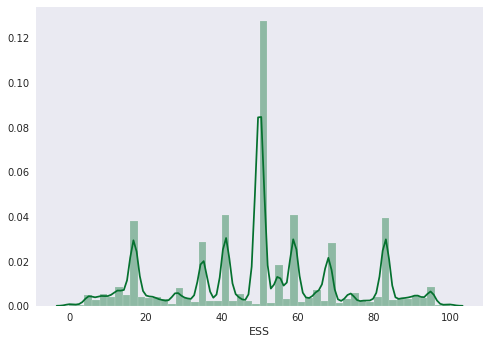

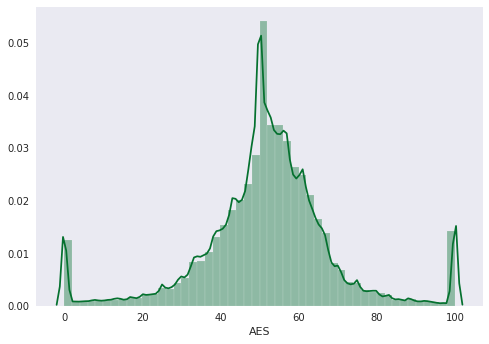

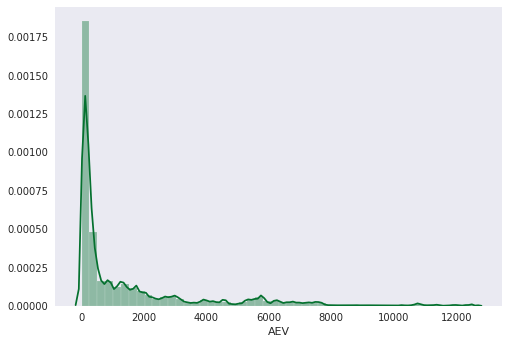

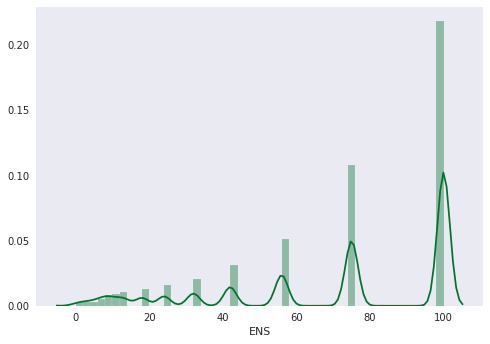

In [22]:
for col in ["ESS", "AES", "AEV", "ENS"]:
    sns.distplot(df[col])
    plt.show()

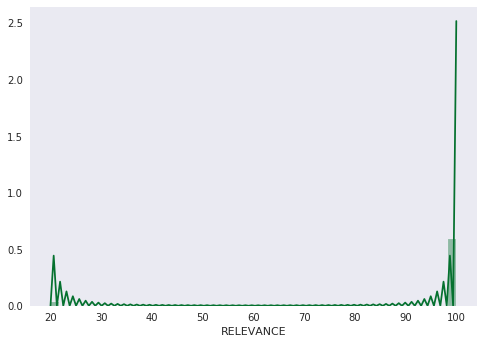

In [32]:
sns.distplot(df.RELEVANCE)

In [24]:
print(df.columns)
print(df.shape)

Index(['TIMESTAMP_UTC', 'RPNA_DATE_UTC', 'RPNA_TIME_UTC', 'RP_ENTITY_ID',
       'ENTITY_TYPE', 'ENTITY_NAME', 'POSITION_NAME', 'RP_POSITION_ID',
       'COUNTRY_CODE', 'RELEVANCE', 'TOPIC', 'GROUP', 'TYPE', 'SUB_TYPE',
       'PROPERTY', 'EVALUATION_METHOD', 'MATURITY', 'CATEGORY', 'ESS', 'AES',
       'AEV', 'ENS', 'ENS_SIMILARITY_GAP', 'ENS_KEY', 'ENS_ELAPSED', 'G_ENS',
       'G_ENS_SIMILARITY_GAP', 'G_ENS_KEY', 'G_ENS_ELAPSED',
       'EVENT_SIMILARITY_KEY', 'NEWS_TYPE', 'SOURCE', 'RP_STORY_ID',
       'RP_STORY_EVENT_INDEX', 'RP_STORY_EVENT_COUNT', 'PRODUCT_KEY'],
      dtype='object')
(2764266, 36)


In [25]:
set(df.ENTITY_TYPE)

{'CMDT', 'COMP', 'CURR', 'ORGA', 'PLCE'}

In [15]:
len(set((df.ENTITY_NAME)))

6790

In [26]:
len(set((df[df.ENTITY_TYPE == "CMDT"].ENTITY_NAME)))

78

In [27]:
set(df[df.ENTITY_TYPE == "CMDT"].ENTITY_NAME)

{'Aluminium',
 'Arabica Coffee',
 'Barley',
 'Beef',
 'Biofuel',
 'Butter',
 'Canola',
 'Castor Oil',
 'Cheese',
 'Coal',
 'Cobalt',
 'Cocoa',
 'Coconut Oil',
 'Coffee',
 'Copper',
 'Copra',
 'Corn',
 'Cotton',
 'Crude Oil',
 'DAP Fertilizer',
 'Electricity',
 'Emissions Permits',
 'Ethanol',
 'Feeder Cattle',
 'Fishmeal',
 'Frozen Orange Juice',
 'Frozen Pork Belly',
 'Fuel Oil',
 'Gasoil',
 'Gasoline',
 'Gold',
 'Hardwood Pulp',
 'Heating Oil',
 'Iron Ore',
 'Kerosene',
 'Lamb',
 'Lead',
 'Lean Hogs',
 'Liquified Petroleum Gas',
 'Live Cattle',
 'Lubricating Oil',
 'Lumber',
 'Molybdenum',
 'Naphtha',
 'Natural Diamond',
 'Natural Gas',
 'Nickel',
 'Non-fuel Oil Residuals',
 'Nuclear',
 'Oat',
 'Palladium',
 'Palm Oil',
 'Platinum',
 'Platinum Group',
 'Potassium Chloride',
 'Poultry',
 'Pulp',
 'Rebar',
 'Robusta Coffee',
 'Rough Rice',
 'Rubber',
 'Silver',
 'Softwood Pulp',
 'Sorghum',
 'Soy Oil',
 'Soybean Meal',
 'Soybeans',
 'Steel',
 'Sugar',
 'Sunflower Oil',
 'Thermal Coal',

(106960, 36)

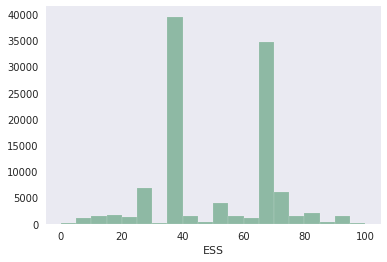

In [14]:
sns.distplot(df[df.ENTITY_NAME == "Crude Oil"].ESS, bins=20, kde=False)
df[df.ENTITY_NAME == "Crude Oil"].shape

In [29]:
df_oil = df[df.ENTITY_NAME == "Crude Oil"]

In [48]:
color = sns.cubehelix_palette(16, start=.5, rot=-.75, reverse=True)

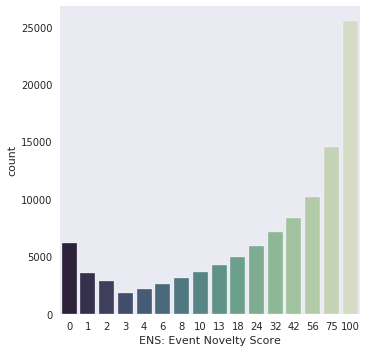

In [49]:
chart = sns.catplot(x="ENS", kind="count", data=df_oil, palette=color)
chart.set_xlabels("ENS: Event Novelty Score")
chart.savefig("eda_figures/crude_oil/{}.png".format("ENS"))
plt.show()

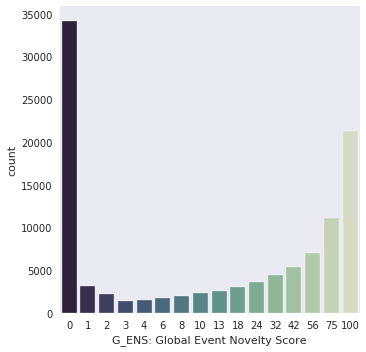

In [50]:
chart = sns.catplot(x="G_ENS", kind="count", data=df_oil, palette=color)
chart.set_xlabels("G_ENS: Global Event Novelty Score")
chart.savefig("eda_figures/crude_oil/{}.png".format("G_ENS"))
plt.show()

## Now up-sample to daily level.

In [48]:
daily_mean_ess = pd.DataFrame(df_oil.groupby("RPNA_DATE_UTC").mean()["ESS"])
daily_sum_ess = pd.DataFrame(df_oil.groupby("RPNA_DATE_UTC").sum()["ESS"])
daily_size = pd.DataFrame(df_oil.groupby("RPNA_DATE_UTC").size())

daily = pd.concat([daily_mean_ess, daily_sum_ess, daily_size], axis=1)
daily.columns = ["MEAN_ESS", "TOTAL_ESS", "COUNTS"]

In [49]:
daily_idx=pd.to_datetime(daily_mean_ess.index, format="%Y%m%d")
daily.index = daily_idx
daily.head()

,MEAN_ESS,TOTAL_ESS,COUNTS
RPNA_DATE_UTC,,,
2000-01-01,50.0,100,2
2000-01-03,68.0,68,1
2000-01-04,60.5,363,6
2000-01-05,35.0,35,1
2000-01-06,41.0,123,3


In [50]:
plot_objects = {
    "Average Daily ESS": daily.MEAN_ESS,
    "Log Total Daily ESS": np.log(daily.TOTAL_ESS),
    "Number of Daily Report": daily.COUNTS
}

In [51]:
[x.replace(" ", "_") for x in plot_objects.keys()]

['Average_Daily_ESS', 'Log_Total_Daily_ESS', 'Number_of_Daily_Report']

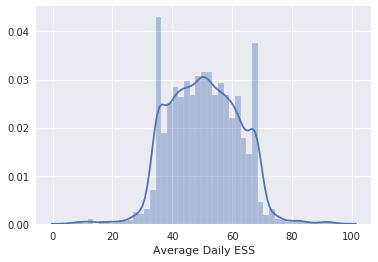

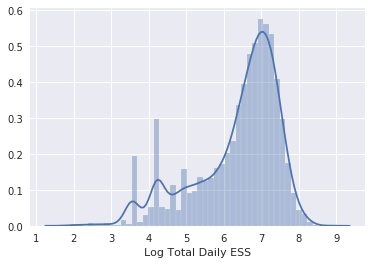

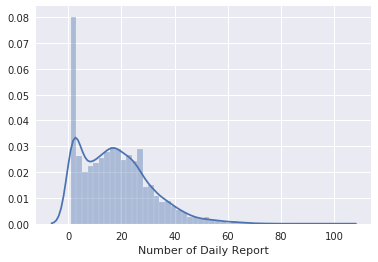

In [102]:
plt.close()
for k, v in plot_objects.items():
    sns.distplot(v, axlabel=k)
    plt.savefig("eda_figures/crude_oil/{}.png".format(k.replace(" ", "_")))
    plt.grid(True)
    plt.show()

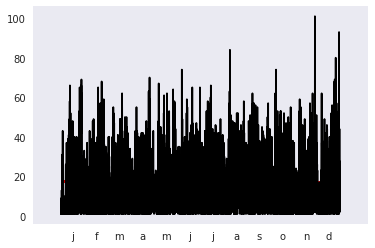

In [53]:
sm.tsa.graphics.month_plot(daily.COUNTS.values, dates=daily.index)
plt.show()

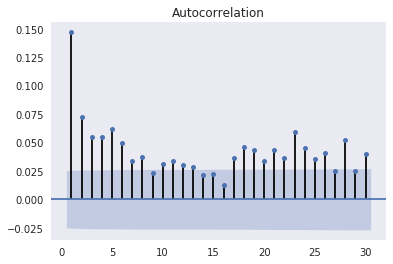

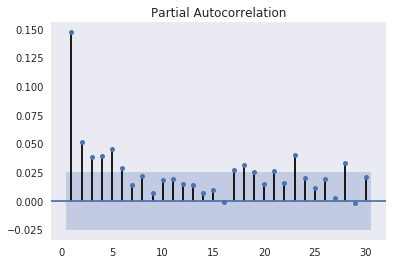

In [103]:
sm.tsa.graphics.plot_acf(daily.MEAN_ESS, lags=30, zero=False)
plt.savefig("eda_figures/crude_oil/{}.png".format("ACF_MEAN_ESS_L30"))
plt.show()
sm.tsa.graphics.plot_pacf(daily.MEAN_ESS, lags=30, zero=False)
plt.savefig("eda_figures/crude_oil/{}.png".format("PACF_MEAN_ESS_L30"))
plt.show()

In [86]:
day_counts = daily.groupby(daily.index.day_name())["COUNTS"].sum()

In [87]:
day_counts = pd.DataFrame(day_counts)
day_counts["DAY"] = day_counts.index
day_counts

,COUNTS,DAY
RPNA_DATE_UTC,,
Friday,17031,Friday
Monday,17763,Monday
Saturday,756,Saturday
Sunday,1275,Sunday
Thursday,20143,Thursday
Tuesday,21269,Tuesday
Wednesday,28723,Wednesday


<Figure size 720x360 with 0 Axes>

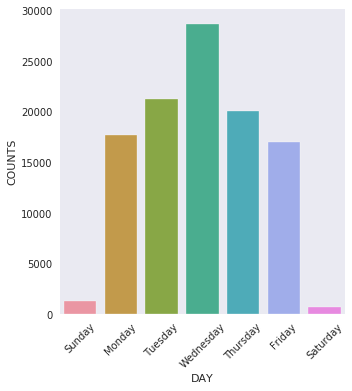

In [133]:
plt.figure(figsize=(10,5))
chart = sns.catplot(x="DAY", y="COUNTS", kind="bar",
            data=day_counts,
            order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
chart.set_xticklabels(rotation=45)
chart.savefig("eda_figures/crude_oil/{}.png".format("Count_Days"))
plt.show()